# Readability Analysis of Job Postings

This notebook analyzes how readable different types of job posts are:
- Real job postings  
- Human-written fake posts  
- AI-refined fake posts  

Understanding readability helps:
- Build trust with clearer language  
- Detect scams using vague/simple text  
- Analyze AI output for unnatural or overly smooth writing

### Readability Metrics Used

- **Flesch Reading Ease**  
  Higher = easier to read  
- **Flesch-Kincaid Grade Level**  
  Grade level needed to understand the text


In [11]:
import pandas as pd
import textstat
import seaborn as sns
import matplotlib.pyplot as plt


# Load datasets
real_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/real_jobs.csv", keep_default_na=False
)
human_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/fake_jobs.csv", keep_default_na=False
)
ai_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/llm_refined_fake_posts2.csv",
    keep_default_na=False,
)

# Label each dataset
real_jobs["label"] = "real"
human_fake_jobs["label"] = "human_fake"
ai_fake_jobs["label"] = "ai_fake"

# Combine all into one dataframe
data = pd.concat(
    [
        real_jobs,
        human_fake_jobs,
        ai_fake_jobs,
    ],
    ignore_index=True,
)

print(data["label"].value_counts())

label
real          17014
human_fake      866
ai_fake         866
Name: count, dtype: int64



## Apply Readability Metrics

We'll now use the `textstat` library to calculate:

- Flesch Reading Ease
- Flesch-Kincaid Grade Level


In [3]:
# Safe scoring functions
def safe_flesch(text):
    try:
        return textstat.flesch_reading_ease(text)
    except Exception:
        return None


def safe_grade(text):
    try:
        return textstat.flesch_kincaid_grade(text)
    except Exception:
        return None


# Apply readability scores
data["desc_flesch"] = data["description"].apply(safe_flesch)
data["desc_grade"] = data["description"].apply(safe_grade)
data["req_flesch"] = data["requirements"].apply(safe_flesch)
data["req_grade"] = data["requirements"].apply(safe_grade)

data_clean = data.dropna(
    subset=["desc_flesch", "req_flesch", "desc_grade", "req_grade"]
)

## Visualizing the Results

We'll compute average readability scores by job post type.

In [9]:
# Calculate average readability scores by label
avg_readability = (
    data_clean.groupby("label")
    .agg(
        {
            "desc_flesch": "mean",
            "req_flesch": "mean",
            "desc_grade": "mean",
            "req_grade": "mean",
        }
    )
    .reset_index()
    .round(2)
)


# Print it
print(avg_readability)

        label  desc_flesch  req_flesch  desc_grade  req_grade
0     ai_fake        32.79       -0.29       10.78       3.23
1  human_fake        32.79       -0.29       10.78       3.23
2        real        43.82       12.45       10.99       6.58


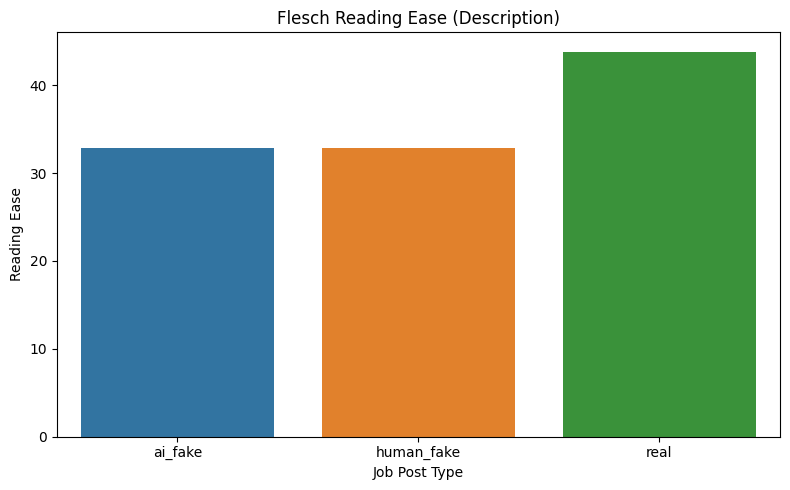

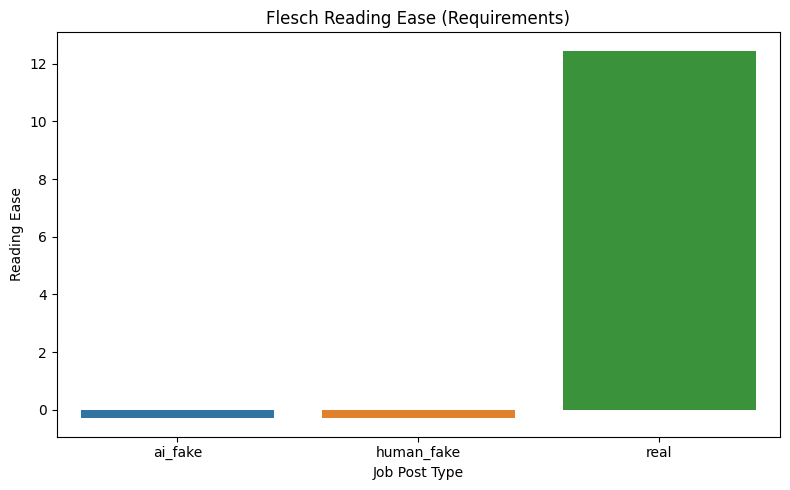

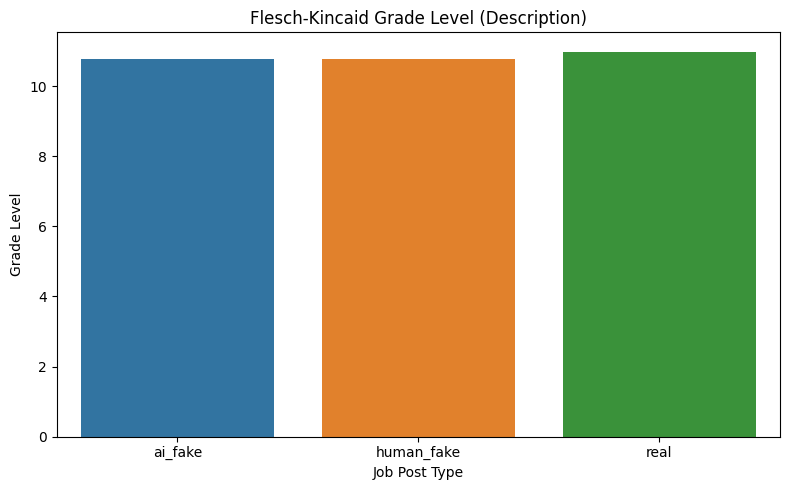

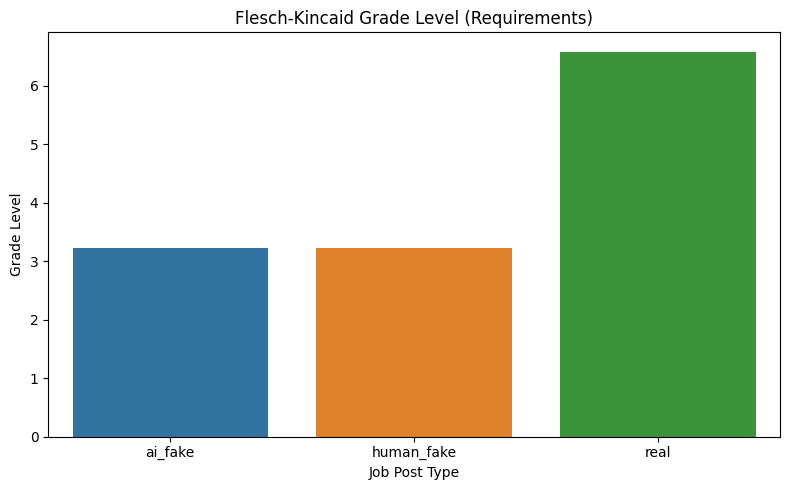

In [5]:
# Description - Flesch Reading Ease
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_readability,
    x="label",
    y="desc_flesch",
    hue="label",
    dodge=False,
    legend=False,
)
plt.title("Flesch Reading Ease (Description)")
plt.ylabel("Reading Ease")
plt.xlabel("Job Post Type")
plt.tight_layout()
plt.show()


# Requirements - Flesch Reading Ease
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_readability,
    x="label",
    y="req_flesch",
    hue="label",
    dodge=False,
    legend=False,
)
plt.title("Flesch Reading Ease (Requirements)")
plt.ylabel("Reading Ease")
plt.xlabel("Job Post Type")
plt.tight_layout()
plt.show()

# Description - Grade Level
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_readability,
    x="label",
    y="desc_grade",
    hue="label",
    dodge=False,
    legend=False,
)
plt.title("Flesch-Kincaid Grade Level (Description)")
plt.ylabel("Grade Level")
plt.xlabel("Job Post Type")
plt.tight_layout()
plt.show()

# Requirements - Grade Level
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_readability,
    x="label",
    y="req_grade",
    hue="label",
    dodge=False,
    legend=False,
)
plt.title("Flesch-Kincaid Grade Level (Requirements)")
plt.ylabel("Grade Level")
plt.xlabel("Job Post Type")
plt.tight_layout()
plt.show()

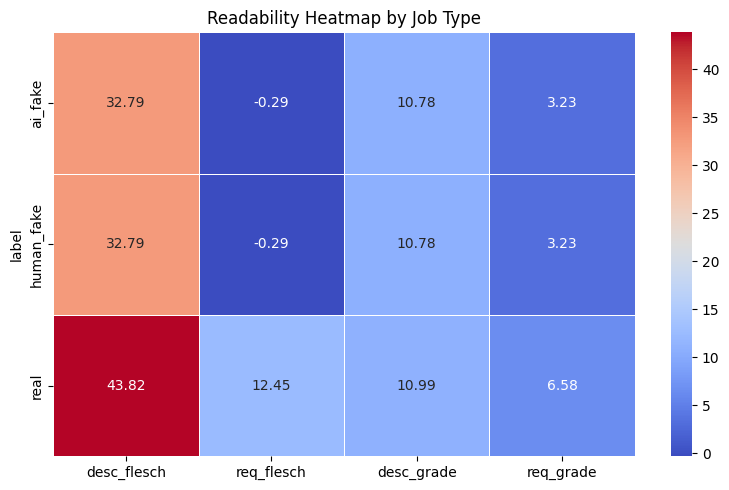

In [12]:
# Heatmap
plt.figure(figsize=(8, 5))

heatmap_data = avg_readability.set_index("label")

sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
)

plt.title("Readability Heatmap by Job Type")
plt.tight_layout()
plt.show()

## Breakdown by Job Type

### AI Fake Job Posts

| Metric        | Value | Interpretation                         |
|---------------|--------|----------------------------------------|
| `desc_flesch` | 32.79 | Hard to read                           |
| `req_flesch`  | -0.29 | Very hard / broken writing             |
| `desc_grade`  | 10.78 | High school-level                      |
| `req_grade`   | 3.23  | Very simple or fragmentary             |

---

### Human Fake Job Posts

*Almost identical scores to AI fake jobs, suggesting similar language tone.*

---

### Real Job Posts

| Metric        | Value | Interpretation                         |
|---------------|--------|----------------------------------------|
| `desc_flesch` | 43.82 | Easier to read — clearer communication |
| `req_flesch`  | 12.45 | Still technical but more readable      |
| `desc_grade`  | 10.99 | Late high school or early college      |
| `req_grade`   | 6.58  | Around 6th–7th grade level             |

---

## Observations

### 1. Fake Posts Are Harder to Read Overall  
- AI and human fakes have low Flesch scores (~32.79)  
- Their requirement sections score even worse (−0.29), likely due to bullets, fragments, or incomplete structure  

### 2. Real Job Posts Are More Balanced and Professional  
- `desc_flesch` = 43.82 → clearer, more natural language  
- `desc_grade` = 10.99 → professional tone  
- `req_grade` = 6.58 → simpler and accessible for general readers  

---

## Key Takeaway

> Fake job posts often use **complex or broken language**, especially in the requirements.  
> Real job posts are **more readable** and maintain **clarity across sections**, indicating professional authorship.

---
